In [1]:
%matplotlib inline
import nivapy3 as nivapy
import mvm_python
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('ggplot')

In [2]:
# Connect to NIVABASE
eng = nivapy.da.connect()

Username:  ···
Password:  ········


Connection successful.


# TOC trends - October 2018 (Part 1: Data upload)

Heleen would like to update the data used in the TOC trends analysis to cover the period from 1990 to 2016 (instead of 1990 to 2012, as used previously). An extended Call for Data was sent out in September 2018, during which several Focal Centres decided to submit entirely new datasets for the whole period of interest. This has created an opportunity to substantially tidy up the existing ICPW database, before re-running the same trend analyses as previously. This notebook describes the start of the data cleaning process.

## 1. TOC trends sites

The 431 sites used in the previous trends analysis are listed in `'toc_trends_sites_by_country_sept_2018.xlsx'`. Based on responses to the Call for Data made in September 2018, I have updated the `'Comment'` column in this spreadsheet to reflect the latest status for each site. Note that several Focal Centres have identifed errors either in the geogreaphic co-ordinates in our dataabse, or in our allocation of sites to particular regions. I have corrected these in the spreadsheet, but the changes need propagating to the database.

The Focal Centres for the UK, Sweden and Finland also identified sites in the "core" ICPW programme that should be removed, either because they have been replaced with other locations, or because there is clear evidence of human impact. I have therefore removed these stations from the core ICPW projects in RESA (but the stations and data themselves are still stored in the database). The following sites have been removed from the core programme:

 * **UK**. Site UK01. See e-mail from Don received 12.09.2018 at 12.49
 
 * **Finland**. Sites FI02 and FI03. See e-mail from Jussi received 04.09.2018 at 12.55
 
 * **Sweden**. Site SE03. See e-mail from Jens received 19.06.2017 at 11.06
 
### 1.1. Update geographic co-ordinates

The code below updates the latitude and longitude values in the database with the lastest values reported by the focal centres (as stored in `'toc_trends_sites_by_country_sept_2018.xlsx'`). 

In [3]:
# Read stn spreadsheet
stn_xlsx = (r'../../../Call_For_data_2018/trends_sites_by_country'
            r'/toc_trends_sites_by_country_sept_2018.xlsx')
stn_df = pd.read_excel(stn_xlsx, sheet_name='all_countries')

stn_df.head()

,station_id,station_code,new_station_code,station_name,nfc_code,type,continent,country,region,subregion,lat,lon,comment
0,23452,CA01,Tr18_CA01,"Ontario, Algoma Region, Batchawana Lake",NaN,L,NaN,Canada,ONT,Ontario,47.060,-84.393,Nothing post-2012
1,23453,CA02,Tr18_CA02,"Ontario, Algoma Region, Wishart Lake",NaN,L,NaN,Canada,ONT,Ontario,47.041,-84.402,Nothing post-2012
2,23454,CA03,Tr18_CA03,"Ontario, Algoma Region, Little Turkey Lake",NaN,L,NaN,Canada,ONT,Ontario,47.041,-84.406,Nothing post-2012
3,23455,CA04,Tr18_CA04,"Ontario, Algoma Region, Turkey Lake",NaN,L,NaN,Canada,ONT,Ontario,47.050,-84.408,Nothing post-2012
4,23456,CA05,Tr18_CA05,"Quebec, Lac Veilleux",NaN,L,NaN,Canada,QuMaVt,Quebec,47.390,-71.572,Data supplied to end 2017


In [ ]:
## Update RESA2
#with eng.begin() as conn: 
#    for idx, row in stn_df.iterrows():
#        # Add new vals to dict
#        var_dict = {'lat':row['lat'],
#                    'lon':row['lon'],
#                    'stn':row['station_id']}
#
#        # Update table
#        sql = ("UPDATE resa2.stations "
#               "SET latitude = :lat, "
#               "  longitude = :lon "
#               "WHERE station_id = :stn")
#        conn.execute(sql, **var_dict)

In [4]:
# Map of stations
nivapy.spatial.quickmap(stn_df, 
                        lon_col='lon',
                        lat_col='lat',
                        popup='station_code',
                        aerial_imagery=True)

## 2. New project and stations

### 2.1. New project for TOC trends 2018

The simplest option for the 2018 trends work is simply to delete all the old trends data and upload the new data supplied during 2018. However, it is possible that the results from the new trends analysis will be different to those from the previous work and, if this is the case, we'll want to know why. This will not be possible if the old data have been replaced. To avoid problems later, I have therefore created a new project in RESA2 called **ICPW_TOCTRENDS_2018** (`project_id=4390`). I will then create 431 new stations, with the same properties as those above, and add the new data to these stations. This is similar to the approach taken by Tore in during the 2015 analysis.

I don't especially like this workflow, as it will make the database even messier. However, it's the only way to keep both datasets available while the updated analysis takes place. Once we're happy with the new results, I can delete the old (2015) TOC trends stuff and the database will then have a similar structure to what it has now.

### 2.2. Create new stations

The code below creates new stations based on the Excel file used above. Only the basic station data required for the trends analysis are entered.

In [ ]:
## Add new stations to RESA2
#with eng.begin() as conn: 
#    for idx, row in stn_df.iterrows():
#        # Add new vals to dict
#        var_dict = {'lat':row['lat'],
#                    'lon':row['lon'],
#                    'cde':row['new_station_code'],
#                    'name':row['station_name'],
#                    'typ':row['type']}
#
#        # Update table
#        sql = ("INSERT INTO resa2.stations ( "
#               "  station_code, "
#               "  station_name, "
#               "  lake_or_river, "
#               "  latitude, "
#               "  longitude) "
#               "VALUES ( "
#               "  :cde, "
#               "  :name, "
#               "  :typ, "
#               "  :lat, "
#               "  :lon)")
#        conn.execute(sql, **var_dict)

In [ ]:
## Add metadata to RESA2
#for idx, row in stn_df.iterrows():       
#    # Get station ID
#    cde = row['new_station_code']
#    sql = ("SELECT station_id FROM resa2.stations "
#           "WHERE station_code = '%s'" % cde)
#    df = pd.read_sql(sql, eng)
#    assert len(df) == 1
#    stn_id = np.asscalar(df['station_id'][0])
#
#    # Deal with pandas reading 'NA' as NaN
#    if pd.isnull(row['continent']):
#        cont = 'NA'
#    else:
#        cont = row['continent']
#
#    # Build df
#    df = pd.DataFrame({'station_id':[stn_id,]*5,
#                       'var_id':[321, 322, 261, 254, 323],
#                       'value':[str(row['nfc_code']), cont, row['country'],
#                                row['region'], row['subregion']]})
#
#    df.to_sql('stations_par_values', 
#              schema='resa2', 
#              if_exists='append', 
#              index=False, 
#              con=eng)

In [ ]:
## Assign stations to project
## Get station IDs
#sql = ("SELECT station_id FROM resa2.stations "
#       "WHERE station_code IN ('%s')" % "','".join(stn_df['new_station_code'].astype(list)))
#df = pd.read_sql(sql, eng)
#
## Add proj ID
#df['project_id'] = 4390
#
## Add to db
#df.to_sql('projects_stations', 
#          schema='resa2', 
#          if_exists='append', 
#          index=False, 
#          con=eng)

Having run the cells above, we now have a new project (`project_id 4390`) in RESA with 431 stations. All the basic station data (NFC code, waterbody type, lat, lon, continent, country, region and sub-region) are also added to the database where available, so they can be queried via the RESA application if desired. I've also corrected the old encoding errors in stations names etc., so the new stations should appear more "cleanly" than they have in the past. A summary table containing all the basic station information is here:

    \ICP_Waters\TOC_Trends_Analysis_2015\update_autumn_2018\toc_trends_oct18_stations.xlsx

In [5]:
# Read summary info
in_xlsx = (r'../../../TOC_Trends_Analysis_2015'
           r'/update_autumn_2018/toc_trends_oct18_stations.xlsx')
stn_df = pd.read_excel(in_xlsx, sheet_name='Data')
stn_df.head()

,station_id,station_code,station_name,nfc_code,latitude,longitude,elevation,type,continent,country,region,subregion
0,38335,Tr18_SE_136,Abiskojaure,136,68.30744,18.656622,488,L,EUR,Sweden,NoNord,NoNordic
1,38510,Tr18_US_ME-2068E,"Abol Pond, Maine",ME-2068E,45.83780,-68.932200,181,L,NaN,United States,QuMaVt,Maine
2,38177,Tr18_QC-213,Adanys,QC-213,46.80556,-74.325000,594,L,NaN,Canada,QuMaVt,Quebec
3,38431,Tr18_UK_24,Afon Gwy,NaN,52.37900,-3.685000,440,R,EUR,United Kingdom,UK,UK
4,38424,Tr18_UK_17,Afon Hafren,NaN,52.45700,-3.480000,355,R,EUR,United Kingdom,UK,UK


## 3. Add country data

The procedure for uploading data is different for each country (and also for some regions within countries). Some Focal Centres have provided entirely new datasets for the period from 1990 to 2016. These datasets can be uploaded directly to the new stations. Other Focal Centres have only provided data for recent years. In these cases, data for earlier time periods must first be transferred from the old RESA trends sites. The most recent data can then be added.

### 3.1. Canada

I have added the data supplied by Suzanne Couture for Newfoundland, Nova Scotia and Quebec. For stations CA05 to CA09 (Quebec), Suzanne only supplied data from 2013 onwards. Data prior to 2013 are already in RESA under the `'TOC_TRENDS_2015'` project. I have therefore exported older data for these sites from RESA to an Excel file named `'ICPW_QC05-09_1990-2012_Tidied.xlsx'`, and then loaded it back into RESA associated with the new stations.

Some points to note:

 1. The new data for Quebec from Suzanne includes duplicated station IDs and sample dates for June 2001 at 31 sites. These appear to be genuine duplicates (i.e. the values are similar, but not identical). I don't think it's worth querying this with Suzanne, as the values are essentially the same in most cases. I have therefore simply chosen one data row from each pair for each site-date combination and ignored the duplicates.
 
 2. There are duplicates in the data from Scott H for the ELA (CA16, 17 19 and 20). These have been similarly ignored
 
 3. There appears to be a bug in Tore's code for unit conversions: in `'resa2.wc_parameters_methods'`, the conversion factor for `'method_id = 10311'` and `'parameter_id = 65'` should be 20 (not 10). I have corrected this
 
 4. Post-2012 data for lakes CA01 to CA04 (the Algoma lakes) was supplied by Kara Chan (see e-mail received 05.12.2018 at 18.32). Similarly, post-2012 data for lakes CA10 to CA14 (in Nova Scotia) has been supplied by Julian (see e-mail received 20.01.2019 at 07.04). I have combined both of these with the earlier data in RESA to create new Excel files for each set of stations. These have then been uploaded to the new project.
 
#### 3.1.1. Corrections for Cl and SO4

According to Suzanne, the analytical method for the Quebec sites changed from colorimetry to chromatography at the start of 2014 (see e-mail received from Heleen 16.10.2018 at 08.33 for details). This has resulted in step changes in the records for Cl and SO4, which must be corrected. Based on a period where both methods were applied together, the relationships between the old technique (colorimetry) and the new one (chromatography) are:

 * **For chloride:** $new = (old - 0.09) / 0.996$
 
 * **For sulphate:** $new = (old - 0.431) / 0.926$
 
I will assume that the new method is more accurate and adjust all the pre-2014 data for these sites using the equations above. First, it's worth checking to see whether the changes are visible (and whether the equations above actually solve the problem).

/opt/conda/lib/python3.6/site-packages/pandas/core/base.py:1241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return self._update_inplace(result)


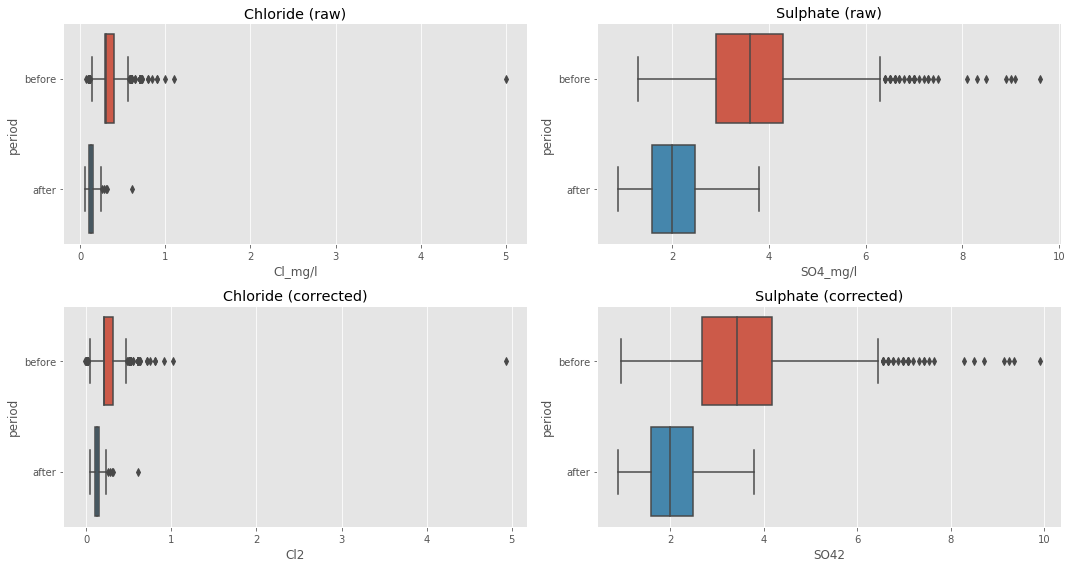

In [6]:
# Get Quebec sites
qc_stns = stn_df.query("subregion == 'Quebec'")
#qc_stns = stn_df.query("station_id == 38177")

# Get data for SO4 (par_id=8) ansd Cl (par_id=7)
qc_data, dups = nivapy.da.select_resa_water_chemistry(qc_stns,
                                                      [7, 8],
                                                      '1970-01-01',
                                                      '2018-01-01',
                                                      eng,
                                                      lod_flags=False)

# Split data according to before or after 2014
qc_data['period'] = np.where(qc_data['sample_date']<'2014-01-01', 
                             'before', 
                             'after')

# Apply corrections
# Cl
qc_data['Cl2'] = np.where(qc_data['period']=='before',
                          (qc_data['Cl_mg/l'] - 0.09)/0.996,
                          qc_data['Cl_mg/l'])

# SO4
qc_data['SO42'] = np.where(qc_data['period']=='before',
                           (qc_data['SO4_mg/l'] - 0.431)/0.926,
                           qc_data['SO4_mg/l'])

# Boxplots 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

# Cl (raw)
sn.boxplot(data=qc_data, 
           y='period', 
           x='Cl_mg/l', 
           orient='h',
           ax=axes[0,0])
axes[0,0].set_title('Chloride (raw)')

# Cl (corrected)
sn.boxplot(data=qc_data, 
           y='period', 
           x='Cl2', 
           orient='h',
           ax=axes[1,0])
axes[1,0].set_title('Chloride (corrected)')

# SO4
sn.boxplot(data=qc_data, 
           y='period', 
           x='SO4_mg/l', 
           orient='h',
           ax=axes[0,1])
axes[0,1].set_title('Sulphate (raw)')

# SO4
sn.boxplot(data=qc_data, 
           y='period', 
           x='SO42', 
           orient='h',
           ax=axes[1,1])
axes[1,1].set_title('Sulphate (corrected)')

plt.tight_layout()

There are clear differences in the data distributions pre- versus post-2014. However, **the corrections proposed by Suzanne do essentially nothing to correct the problem**. I don't see much point in applying these equations, as they don't really achieve anything. I also don't want to apply any arbitray corrections, as this may remove genuine trends. **I will therefore leave the original data as they are for now**, but I can return to this later if necessary. 

#### Update 18.02.2019

During subsequent e-amil discussion (see e.g. e-mail from john received 15.02.2019 at 23.53), it becomes apparent that we have included Mount Tom Lake, Nova Scotia in the dataset twice: it appears both as station CA10 in the "core" programme and as NS01ED0043 in the "trends" data. I have therefore removed (and deleted) station Tr18_CA10 from the ICPW_TOCTRENDS_2018 project. This leaves 429 stations in total.

### 3.2. Czech Republic

I have combined the 2016 data submitted last year with the full data series (up to 2015) sent previously. See:

    ...\ICP_Waters\Call_For_data_2018\replies\czech_republic\czech_to_2016_all_jes.xls
    
### 3.3. Finland

Jusi has submitted an entirely new data series from 1990 to 2016. The tidied data can be found here:

    ...\ICP_Waters\Call_For_data_2018\replies\finland\icpw_trends_finland_1990-2017_jes_tidied.xls
    
### 3.4. Norway

I have extracted the key parameters for 1990 to 2016 from RESA and then added them to an input template here:

    ...\ICP_Waters\Call_For_data_2018\replies\norway\norway_1990_2016_resa_export_jes.xlsx
    
### 3.5. Sweden

I have created a [Python wrapper for the Swedish MVM database](https://github.com/NIVANorge/mvm_python), making it possible to query data directly via the MVM API. A notebook comparing the data available via the API to the data already in RESA2 is [here](https://github.com/NIVANorge/mvm_python/blob/master/notebooks/query_sweden_mvm_api.ipynb). The code below transfers data from the Swedish database to RESA.

In [7]:
# Get a list of just the Swedish sites
swe_df = stn_df.query('country == "Sweden"')
print (len(swe_df))
swe_df.head()

83


,station_id,station_code,station_name,nfc_code,latitude,longitude,elevation,type,continent,country,region,subregion
0,38335,Tr18_SE_136,Abiskojaure,136,68.307440,18.656622,488,L,EUR,Sweden,NoNord,NoNordic
5,38336,Tr18_SE_96,Allgjuttern,96,57.947947,16.096327,131,L,EUR,Sweden,SoNord,SoSweden
8,38337,Tr18_SE_111,Alsjön,111,59.863715,18.812205,113,L,EUR,Sweden,SoNord,SoSweden
9,38338,Tr18_SE_1070,Alstern,1070,59.724411,12.757959,160,L,EUR,Sweden,SoNord,SoSweden
22,38339,Tr18_SE_1074,Betarsjön,1074,59.218962,17.826966,198,L,EUR,Sweden,SoNord,SoSweden


In [10]:
# Lookup table matching MVM pars to RESA methods
par_map_xlsx = (r'../../../Sweden_MVM_API/map_mvm_pars_to_resa2.xlsx')
par_map_df = pd.read_excel(par_map_xlsx)
par_map_df

,mvm_par,factor,icpw_par,icpw_method_id
0,Alk/Acid,1.00,ALKGMILLI,10297
1,SO4_IC,1.00,SO4_IC mekv/l,10555
2,NO2+NO3-N,1.00,NO3N,10265
3,Cl,1.00,Cl,10556
4,TOC,1.00,TOC,10273
5,KMnO4,0.25,Perm,10267
6,pH,1.00,pH,10268
7,Ca,1.00,Ca mekv/l,10551
8,Mg,1.00,Mg mekv/l,10552
9,Na,1.00,Na mekv/l,10553


In [11]:
def f(row):
    """ Function to deal with flags.
    """
    if '<' in row['value_']:
        val = '<'
    elif '>' in row['value_']:
        val = '>'
    else:
        val = np.nan
    return val

In [ ]:
## Path to local file containing MVM access tokens
#token_xlsx = (r'C:\Data\James_Work\Staff\Heleen_d_W\ICP_Waters'
#              r'\Sweden_MVM_API\md_mvm_tokens.xlsx')
#
## Time period of interest
#st_yr = 1990
#end_yr = 2016
#
## Loop over stations
#for idx, row in list(swe_df.iterrows()):
#    # Get IDs
#    resa_id = row['station_id']
#    mvm_id = row['nfc_code']
#    name = row['station_name']
#    print('Processing: %s' % name)
#    print ('    Getting data from MVM...')
#    
#    # Get data from MVM
#    mvm_df = mvm_python.query_mvm_station_data(mvm_id, 
#                                               st_yr, 
#                                               end_yr, 
#                                               token_xlsx)
#    
#    print ('    Restructuring...')
#    
#    # Get pars of interest    
#    mvm_df = pd.merge(mvm_df, par_map_df, 
#                      how='inner',
#                      left_on='par_name', 
#                      right_on='mvm_par')
#    
#    # Convert units
#    mvm_df['value'] = mvm_df['value'] * mvm_df['factor']
#    
#    # If multiple depths are available, get the shallowest
#    mvm_df.sort_values(by=['depth1', 'depth2'], inplace=True)
#    mvm_df.drop_duplicates(subset=['mvm_id', 'sample_date', 'par_name'], 
#                           inplace=True)
#    
#    # Get just cols of interest
#    mvm_df = mvm_df[['sample_date', 'icpw_method_id', 'value']]  
#    
#    # Make sure the df can be pivoted (integrity check - don't actually need 
#    # to pivot, so result is not saved as variable)
#    mvm_df.pivot(index='sample_date', columns='icpw_method_id')
#    
#    # Build water samp df
#    ws_df = mvm_df[['sample_date']].copy()
#    ws_df['station_id'] = resa_id
#    ws_df['depth1'] = 0
#    ws_df['depth2'] = 0
#    ws_df.drop_duplicates(subset=['sample_date'], inplace=True)
#    ws_df.sort_values(by='sample_date', inplace=True)
#    ws_df = ws_df[['station_id', 'sample_date', 'depth1', 'depth2']]
#    
#    # Add water samples to db
#    print ('    Writing data to WATER_SAMPLES table...')
#    
#    dtypes = {c:types.VARCHAR(ws_df[c].str.len().max())
#              for c in ws_df.columns[ws_df.dtypes == 'object'].tolist()}
#
#    ws_df.to_sql(name='water_samples', 
#                 schema='resa2',
#                 con=eng, 
#                 if_exists='append', 
#                 index=False,
#                 dtype=dtypes)
#    
#    # Get sample_ids back from db
#    print ('    Identifying sample IDs...')
#    
#    sql = ('SELECT water_sample_id, station_id, sample_date '
#           'FROM resa2.water_samples '
#           'WHERE station_id = %s' % resa_id)
#    ws_df = pd.read_sql_query(sql, eng)
#
#    print ('    Checking data integrity...')
#    
#    # Join sample id to chemistry
#    chem_df = pd.merge(mvm_df, ws_df, how='left', on='sample_date')
#    
#    # Get cols of interest
#    chem_df = chem_df[['water_sample_id', 'icpw_method_id', 'value']]
#    chem_df.columns = ['sample_id', 'method_id', 'value_']
#    
#    # Drop NaNs
#    chem_df.dropna(how='any', inplace=True)
#    
#    # Deal with flags
#    chem_df['value_'] = chem_df['value_'].astype(str)
#    chem_df['flag1'] = chem_df.apply(f, axis=1)
#
#    # Extract numeric chars
#    chem_df['value'] = chem_df['value_'].str.extract("([-+]?\d*\.\d+|\d+)", expand=True)
#    chem_df['value'] = chem_df['value'].astype(float)
#    del chem_df['value_']
#    
#    # Reorder cols
#    chem_df = chem_df[['sample_id', 'method_id', 'value', 'flag1']]
#
#    # Check flags are consistent
#    if not pd.isnull(chem_df['flag1']).all():
#        if not set(chem_df['flag1'].unique()).issubset(['<', '>', np.nan]):
#            print ('Some flags are not valid:')
#            print (chem_df['flag1'].unique())
#
#    # Add chem to db
#    print ('    Writing data to WATER_CHEMISTRY_VALUES2 table...')
#    
#    dtypes = {c:types.VARCHAR(chem_df[c].str.len().max())
#              for c in chem_df.columns[chem_df.dtypes == 'object'].tolist()}
#
#    chem_df.to_sql(name='water_chemistry_values2', 
#                   schema='resa2',
#                   con=eng, 
#                   if_exists='append', 
#                   index=False,
#                   dtype=dtypes)
#    
#    print ('    Done.')

### 3.6. Poland and Slovakia

A complete dataset spanning the period 1990 to 2016 has been supplied by Jiri Kopacek from the Czech Republic. A tidied data file is here:

    ...ICP_Waters\Call_For_data_2018\replies\slovakia_poland\ICPW_Tatra_Mts_1990-2017_JES.xls

Note that two pH values have been entered as zero in Jiri's template, which cannot be correct. I have assumed these should be "No Data".

### 3.7. UK

Don has provided new data for the UK sites covering the period from 2013 to 2016. I have extracted the pre-2013 data from RESA2 and combined everything into a single file named `'icpw_uk_toc_trends_all.xlsx'`. 

**Note:** While comparing old and new data, I noticed a discrepancy between the pre- and post-2013 values for NO3. Having queried this with Don, it appears that all the pre-2013 data templates for nitrate were filled in a factor of 10 too low **i.e. all the NO3 data for the UK in RESA is 10 times too small**. See the e-mail from Don received 17.01.2019 at 16.22 for details. I have corrected this error in the Excel sheet named above and uploaded all the new data to the `'Tr18_'` project. **Also need to check whether there are other UK sites in the "core" project that need correcting too**.    

### 3.8. USA

John has sent a complete new dataset - see e-mails received 12.09.2018 at 22.56 and 26.10.2018 at 22.24. Note the following:

 * Some station codes have changed. The latest codes are given in
 
        ...\ICP_Waters\Call_For_data_2018\replies\usa\JLS.additions.icpw_match_usa_stns_oct_2018 (002).xlsx        

 I have updated the `'nfc_code'` and `'station_code'` fields in the database to reflect this (but **only** for the stations associated with the `'ICPW_TOCTRENDS_2018'` project. The same changes have also been made in these files:
    
        ...\ICP_Waters\Call_For_data_2018\usa_trends_and_core_sites.xlsx
        ...\ICP_Waters\TOC_Trends_Analysis_2015\update_autumn_2018\toc_trends_oct18_stations.xlsx
        
        
 * One station (Newbert Pond, Maine; M-9998E) has been removed from the trend analysis, as monitoring was stopped in 2008. **This leaves 430 stations in total**
 
 * John's lakes dataset includes measurements from multiple depths, and sometimes depths are left blank. I have assumed blank entries correspond to surface samples (i.e. depth = 0), other we have no surface data for around 15 sites. I have thenfiltered out any other samples from depths greater than 1 m. Note that I originally tried 0.5 m in order to be compatible with data from elsewhere, but this results in no data at all for two sites (`'1C1-089'` and `'1C1-101'`), where the shallowest samples post-1989 are from 1 m depth.
 
The code below reads the updated station IDs from the database, then restructures John's raw data to create an Excel file in a format compatible with the ICPW input template.

**Note:** Comparing the old data in the database with what has been recently supplied by John, there appear to numerous errors with unit conversions etc. As far as I can tell, all the **old values for NH4, NO3 and SiO2 are wrong**. The old database should therefore be used with caution.

**Note 2:** The are lots of duplicated records in John's data. These look genuine and the values are usually very similar, so the **duplicates have been averaged**.

The Excel file created below has been added to the database.

In [12]:
# Get list of US trends stations
stn_df = nivapy.da.select_resa_project_stations([4390], eng)
stn_df = stn_df['station_code'].str.split('_', expand=True)
us_cds = list(stn_df[stn_df[1] == 'US'][2].unique())
len(us_cds)

75

In [13]:
# Read stream data
riv_xl_path = r'../../../Call_for_Data_2018/replies/usa/Stoddard LTM streams_2018.xls'
riv_df = pd.read_excel(riv_xl_path, sheet_name='LTM stream data 1979-2016')

# Tidy
del riv_df['PROGRAM'], riv_df['YR']
del riv_df['ALDS'], riv_df['ALOR']
del riv_df['DIC'], riv_df['FLOW']

# Rename
riv_df.rename({'SITE_ID':'Code',
               'DATE_TIME':'Date',
               'ALTD':'TAL',
               'ANC':'ALKGMIKRO',
               'CA':'Ca',
               'CL':'Cl',
               'COND':'K25X',
               'DOC':'TOC',
               'MG':'Mg',
               'NA':'Na',
               'NH4':'NH4N',
               'NO3':'NO3N',
               'PH':'pH',
               'SIO2':'SiO2',
               'SO4':'SULF',
               'WTEMP':'TEMP'},
              inplace=True,
              axis=1)

# Convert units
riv_df['Ca'] = riv_df['Ca']*40.1/(1000*2)        # ueq/l to mg/l
riv_df['Cl'] = riv_df['Cl']*35.45/(1000*1)       # ueq/l to mg/l
riv_df['K'] = riv_df['K']*39.1/(1000*1)          # ueq/l to mg/l
riv_df['Mg'] = riv_df['Mg']*24.3/(1000*2)        # ueq/l to mg/l
riv_df['Na'] = riv_df['Na']*23./(1000*1)         # ueq/l to mg/l
riv_df['NH4N'] = riv_df['NH4N']*14.              # ueq/l to ugN/l
riv_df['NO3N'] = riv_df['NO3N']*14.              # ueq/l to ugN/l
riv_df['SULF'] = riv_df['SULF']*96.065/(1000*2)  # ueq/l to mgSO4/l

riv_df.head()

,Code,Date,TAL,ALKGMIKRO,Ca,Cl,K25X,TOC,K,Mg,Na,NH4N,NO3N,pH,SiO2,SULF,TEMP
0,01362285,1983-08-15,60.0,32.0,2.40199,0.740905,28.0,0.7,0.19941,0.829845,0.6003,NaN,429.8,6.50,2.5,7.075187,NaN
1,01362285,1983-11-01,10.0,26.0,2.20149,0.769265,27.0,1.8,0.30107,0.890595,0.7015,NaN,180.6,6.30,2.1,6.935893,NaN
2,01362285,1983-12-15,10.0,18.0,2.30174,0.779900,23.0,2.5,0.28152,0.760590,0.5014,NaN,309.4,6.24,1.9,5.994456,NaN
3,01362285,1984-02-02,30.0,20.0,2.30174,0.740905,22.5,2.2,0.23069,0.850500,0.6003,NaN,410.2,6.20,1.8,6.835025,NaN
4,01362285,1984-04-02,50.0,24.0,2.20149,0.769265,25.0,0.9,0.25024,0.810405,0.5014,NaN,270.2,6.35,1.6,6.354700,NaN


In [14]:
# Read lake data
la_xl_path = r'../../../Call_for_Data_2018/replies/usa/Stoddard LTM lakes_2018.xls'
la_df = pd.read_excel(la_xl_path, sheet_name='LTM lake data 1980-2016')

# Fill NaN in DEPTH column with 0
la_df['DEPTH'] = la_df['DEPTH'].fillna(0)

# Get surface only
la_df = la_df.query("DEPTH <= 1")

# Tidy
del la_df['PROGRAM'], la_df['SAMTYPE']
del la_df['year'], la_df['month'], la_df['day']
del la_df['ALDS'], la_df['ALOR'], la_df['CHLA']
del la_df['DIC'], la_df['PHEQ'], la_df['DEPTH']

# Rename
la_df.rename({'SITE_ID':'Code',
              'DATE_TIME':'Date',
              'AL':'TAL',
              'ANC':'ALKGMIKRO',
              'CA':'Ca',
              'CL':'Cl',
              'COLOR':'COLOUR',
              'COND':'K25X',
              'DOC':'TOC',
              'MG':'Mg',
              'NA':'Na',
              'NH4':'NH4N',
              'NO3':'NO3N',
              'PH':'pH',
              'PTL':'TOTP',
              'SIO2':'SiO2',
              'SO4':'SULF',
              'WTEMP':'TEMP'},
              inplace=True,
              axis=1)

# Convert units
la_df['Ca'] = la_df['Ca']*40.1/(1000*2)        # ueq/l to mg/l
la_df['Cl'] = la_df['Cl']*35.45/(1000*1)       # ueq/l to mg/l
la_df['K'] = la_df['K']*39.1/(1000*1)          # ueq/l to mg/l
la_df['Mg'] = la_df['Mg']*24.3/(1000*2)        # ueq/l to mg/l
la_df['Na'] = la_df['Na']*23./(1000*1)         # ueq/l to mg/l
la_df['NH4N'] = la_df['NH4N']*14.              # ueq/l to ugN/l
la_df['NO3N'] = la_df['NO3N']*14.              # ueq/l to ugN/l
la_df['SULF'] = la_df['SULF']*96.065/(1000*2)  # ueq/l to mgSO4/l

la_df.head()

,Code,Date,TAL,ALKGMIKRO,Ca,Cl,COLOUR,K25X,TOC,K,Mg,Na,NH4N,NO3N,pH,TOTP,SiO2,SULF,TEMP
0,020058O,1992-06-08,171.0,27.90,2.101040,0.449860,100.0,21.25,12.70,0.500480,0.498150,0.70035,2.38,16.24,5.574,NaN,1.81,4.235986,NaN
1,020058O,1992-07-06,172.0,42.30,1.941041,0.359818,90.0,20.61,12.78,0.450432,0.478224,0.67045,25.62,9.94,5.600,NaN,0.30,4.455975,NaN
2,020058O,1992-08-03,153.0,29.66,1.910966,0.347765,80.0,20.35,12.44,0.410550,0.438372,0.67045,20.16,10.78,5.731,NaN,0.19,4.066431,NaN
3,020058O,1992-09-01,188.0,38.52,1.500742,0.339966,70.0,20.45,11.88,0.350336,0.518076,0.73048,74.48,8.82,5.664,NaN,0.85,4.256160,NaN
4,020058O,1992-10-05,175.0,35.73,2.371113,0.659725,90.0,20.94,11.94,0.380443,0.498150,0.65044,-16.24,0.00,5.670,NaN,2.42,4.216293,NaN


In [15]:
# Combine river and lake data
us_df = pd.concat([riv_df, la_df], axis=0, sort=False)

# Filter to just sites in trends project
us_df = us_df[us_df['Code'].isin(us_cds)]

# Build site codes
us_df['Code'] = 'Tr18_US_' + us_df['Code']

# Average duplicates
us_df = us_df.groupby(['Code', 'Date']).mean()

# Tidy
us_df.reset_index(inplace=True)

# Check we have data for all sites
assert len(us_df['Code'].unique()) == len(us_cds), 'Some stations have no data.' 

# Save to Excel
out_xl = r'../../../Call_for_Data_2018/replies/usa/usa_lake_stream_all_to_2016_tidied.xlsx'
us_df.to_excel(out_xl, sheet_name='Data', index=False)

us_df.head()

,Code,Date,TAL,ALKGMIKRO,Ca,Cl,K25X,TOC,K,Mg,Na,NH4N,NO3N,pH,SiO2,SULF,TEMP,COLOUR,TOTP
0,Tr18_US_01364959,1983-08-16,50.0,24.4,2.401990,0.719635,27.0,1.0,0.26197,0.749655,0.7015,NaN,359.8,6.2,2.8,6.983926,NaN,NaN,NaN
1,Tr18_US_01364959,1983-11-01,50.0,12.0,2.000990,0.779900,28.0,1.7,0.35190,0.720495,0.5014,NaN,180.6,6.0,2.6,7.012745,NaN,NaN,NaN
2,Tr18_US_01364959,1983-12-14,390.0,-24.0,1.401495,0.560110,25.5,3.7,0.35190,0.449550,0.5014,NaN,299.6,4.7,1.4,5.374837,NaN,NaN,NaN
3,Tr18_US_01364959,1984-02-02,130.0,-2.0,2.000990,0.641645,22.7,NaN,0.25024,0.739935,0.6003,NaN,420.0,5.6,2.2,6.955106,NaN,NaN,NaN
4,Tr18_US_01364959,1984-04-03,30.0,6.0,1.800490,0.549475,24.0,1.0,0.26197,0.669465,0.4002,NaN,330.4,5.4,1.8,6.493994,NaN,NaN,NaN


## 4. Summary

I have created a new project associated with the 430 trends sites and have added water chemistry data spanning the period 1990 to 2016 for each location. In some cases, completely new time series have been provided by the Focal Centres for the whole 1990 - 2016 period; in others, Focal Centres have provided data for 2012 to 2016, which I have combined with the previous data (1990 to 2012) already in the database.

Being provided with complete new datasets creates opportunities for further data checking, and a number of new quality issues have been identified. The main ones worth mentioning are:

 * All of the pre-2013 data for NO3 in the UK (i.e. data already in the ICPW database for 22 sites) was a factor of 10 too low (see the e-mail from Don received 17.01.2019 at 16.22 for details)
 
 * There was a factor 2 error in the old database code for converting alkalinity from mg/l to ueq/l (the value in the old code was 10, but should have been 20). I have corrected this, but numerous previous data exports may have been affected. See e-mail from Øyvind Garmo received 02.11.2018 at 16.59 for details
 
 * Comparing old and new values in the database for NH4, NO3 and SiO2 for sites in the USA suggests that unit conversion errors have been made at various points in the past. For example SiO2, measured as mg-(SiO2)/l has sometimes been uploaded as mg-Si/l, and vice versa. Perhaps more importantly, a factor of 1000 has sometimes been missed in converting NO3 and NH4 from mass to equivalents, and sometimes NO3-N and NH4-N have been uploaded at NO3 and NH4 (or vice versa). Note that these errors affect the calculation of ANC, as well as the values for ENO3 and ENH4
 
Finally, Suzanne Couture highlighted a method change for the Quebec sites that took place at the start of 2014, suggesting that we use regression equations to adjust the pre-2014 data series for Cl and SO4. However, the proposed corrections appear to have a negligible effect on step changes in the data. This implies that either (i) the proposed correction equations substantially underestimate the effects of the method change, or (ii) the step change is due to something other than a change in method. I have not yet applied any correction factors, as with the current equations any differences are likely to be negligible ofr the trends work.

## 5. Corrections February 2019

Having worked a little with the new dataset, some further corrections and additions are required. In summary:

 1. Correct all TOC data from New Foundland and Nova Scotia collected **before March 1995** by a factor of 1.28 (see e-mail from John received 21.02.2019 at 23.58 for details)
 
 2. Correct Catskill data. All DOC values for samples collected **after October 1st 2014** should be *divided* by 83.26, and all aluminum values for the same period should be *multiplied* by 26.98 (see e-mail from John received 23.02.2019 at 01.09 for details)
 
 3. Add data for three additional sites in the Netherlands (see e-mail from Heleen received 26.02.2019 at 14.36 for details)
 
### 5.1. Correct Canadian TOC

I have previously created a database method called `'DOC_Canada_old method'`, which implcitly includes the factor of 1.28. All relevant Canadian TOC samples from pre-March 1995 therefore need switching to this method.

In [3]:
# Read summary info
in_xlsx = (r'../../../TOC_Trends_Analysis_2015'
           r'/update_autumn_2018/toc_trends_oct18_stations.xlsx')
stn_df = pd.read_excel(in_xlsx, sheet_name='Data')

# Just NF and NS
nf_ns_df = stn_df.query('subregion in ("New Foundland", "Nova Scotia")')

print(len(nf_ns_df))
nf_ns_df.head()

63


,station_id,station_code,station_name,nfc_code,latitude,longitude,elevation,type,continent,country,region,subregion
0,38103,Tr18_NF02YH0013,Unnamed,NF02YH0013,49.596667,-57.733333,665,L,NaN,Canada,AtlCan,New Foundland
1,38104,Tr18_NF02YH0014,Unnamed,NF02YH0014,49.437222,-57.531667,571,L,NaN,Canada,AtlCan,New Foundland
2,38105,Tr18_NF02YH0015,Unnamed,NF02YH0015,49.460833,-57.525000,457,L,NaN,Canada,AtlCan,New Foundland
3,38106,Tr18_NF02YH0025,Unnamed,NF02YH0025,49.562222,-57.726389,673,L,NaN,Canada,AtlCan,New Foundland
4,38107,Tr18_NF02YS0003,Rattle Pond,NF02YS0003,48.513611,-53.824444,30,L,NaN,Canada,AtlCan,New Foundland


In [11]:
## Switch TOC/DOC pre-March 1995 to method with correction factor of 1.28
#with eng.begin() as conn: 
#    sql = ("UPDATE resa2.water_chemistry_values2 "
#           "SET method_id = 10823 "
#           "WHERE sample_id IN ( "
#           "  SELECT water_sample_id "
#           "  FROM resa2.water_samples "
#           "  WHERE station_id IN %s "
#           "  AND sample_date < DATE '1995-03-01') "
#           "AND method_id IN (10294, 10273)" % str(tuple(list(nf_ns_df['station_id'].values))))
#    conn.execute(sql)

### 5.2. Correct Catskill DOC and Al

In [4]:
# Just Catskill stations
cat_df = stn_df.query('subregion == "Catskills"')
cat_df

,station_id,station_code,station_name,nfc_code,latitude,longitude,elevation,type,continent,country,region,subregion
402,38470,Tr18_US_01434025,"Biscuit Brook, Catskills",01434025,42.0111,-74.4147,634,R,NaN,United States,AdsCsk,Catskills
403,38468,Tr18_US_0143400680,"East Branch Neversink River, Catskills",0143400680,41.9869,-74.5031,652,R,NaN,United States,AdsCsk,Catskills
404,38467,Tr18_US_01364959,"Rondout Creek, Catskills",01364959,41.9367,-74.3764,503,R,NaN,United States,AdsCsk,Catskills
405,38469,Tr18_US_01434021,"West Branch Neversink River at Winnisook, Cats...",01434021,41.9725,-74.4483,816,R,NaN,United States,AdsCsk,Catskills


In [8]:
## Apply factor of 1/83.26 to DOC
#with eng.begin() as conn: 
#    sql = ("UPDATE resa2.water_chemistry_values2 "
#           "SET value = value/83.26 "
#           "WHERE sample_id IN ( "
#           "  SELECT water_sample_id "
#           "  FROM resa2.water_samples "
#           "  WHERE station_id IN %s "
#           "  AND sample_date > DATE '2014-10-01') "
#           "AND method_id = 10273" % str(tuple(list(cat_df['station_id'].values))))
#    conn.execute(sql)

In [11]:
## Apply factor of 26.98 to Al
#with eng.begin() as conn: 
#    sql = ("UPDATE resa2.water_chemistry_values2 "
#           "SET value = value*26.98 "
#           "WHERE sample_id IN ( "
#           "  SELECT water_sample_id "
#           "  FROM resa2.water_samples "
#           "  WHERE station_id IN %s "
#           "  AND sample_date > DATE '2014-10-01') "
#           "AND method_id = 10249" % str(tuple(list(cat_df['station_id'].values))))
#    conn.execute(sql)

## 5.3. Add Netherlands stations

I have created three new stations in the dataabse, added data from the Netherlands and made links to the `'ICPW_TOCTRENDS_2018'` project. Note that there are some duplicates in Herman's data, but these are usually very similar and have therefore been ignored. The new sites have also been added to 

    .\ICP_Waters\TOC_Trends_Analysis_2015\update_autumn_2018\toc_trends_oct18_stations.xlsx
    
This gives **432 stations** in total.